<a href="https://colab.research.google.com/github/monishrao/Python-/blob/master/Monish_CoronaBatch_Q9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
from datetime import datetime 

# CoronaBatch : Ashwin , Ashish , Sangeeta , Monish

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



horse truck  deer  deer


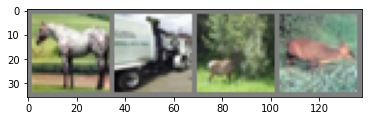

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
    def get_data_loader(self, train, test, batch_size=128):
        SEED = 1
        # CUDA?
        cuda = torch.cuda.is_available()
        print("CUDA Available?", cuda)

        # For reproducibility
        torch.manual_seed(SEED)

        if cuda:
            torch.cuda.manual_seed(SEED)

        # dataloader arguments - something you'll fetch these from cmdprmt
        dataloader_args = dict(shuffle=True, batch_size=batch_size, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

        # train dataloader
        train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

        # test dataloader
        test_loader = torch.utils.data.DataLoader(test, **dataloader_args)
        return train_loader, test_loader

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [0]:
import torch.nn as nn
import torch.nn.functional as F

dropout = 0.09 
class Net(nn.Module):
    print("Current Date/Time: ", datetime.now())
    def __init__(self):
        super(Net, self).__init__() #returns a proxy object that allows us to access methods of the base class
        #x2 = conv x1
        self.conv1 = nn.Conv2d(3, 32, 2) #1st Convolution Layer: input=1 #kernels=32,kernelsize=3,stride=1,padding=1, lrf = 3
        self.relu =  nn.ReLU()
        self.bn =  nn.BatchNorm2d(64)
        self.do = nn.Dropout(dropout)

        #x3 = conv x2
        self.conv2 = nn.Conv2d(32, 32, 2)#2nd Convolution Layer:input=32 #kernels=64,kernelsize=3,stride=1,padding=1,lrf = 5
        self.relu = nn.ReLU()           
        self.bn = nn.BatchNorm2d(64)
        self.do = nn.Dropout(dropout)
        
        #x4 = pool (x1,x2,x3)
        self.pool1 = nn.MaxPool2d(2, 2)#1st max pooling layer: - 2x2, reduces the image size by half (makes it 14x14), doubling the receptive field, lrf=10
        
        #x5 = conv(x4)
        self.conv3 = nn.Conv2d(32, 32, 2)#3rd Convolution Layer: input=64 #kernels=128,kernelsize=3,stride=1,padding=1,lrf = 12
        self.relu = nn.ReLU()           
        self.bn = nn.BatchNorm2d(64)
        self.do = nn.Dropout(dropout)

        #x6 = conv(x5)
        self.conv4 = nn.Conv2d(32, 32, 2)#3rd Convolution Layer: input=64 #kernels=128,kernelsize=3,stride=1,padding=1,lrf = 12
        self.relu = nn.ReLU()           
        self.bn = nn.BatchNorm2d(128)
        self.do = nn.Dropout(dropout)

        #x7 = conv(x6)
        self.conv5 = nn.Conv2d(32, 32, 2)#3rd Convolution Layer: input=64 #kernels=128,kernelsize=3,stride=1,padding=1,lrf = 12
        self.relu = nn.ReLU()           
        self.bn = nn.BatchNorm2d(64)
        self.do = nn.Dropout(dropout)

        #x8 = pool (x5,x6,x7)
        self.pool2 = nn.MaxPool2d(2, 2)#1st max pooling layer: - 2x2, reduces the image size by half (makes it 14x14), doubling the receptive field, lrf=10
 
        #x9 = conv(x8)
        self.conv6 = nn.Conv2d(32, 32, 2)  #4th Convolution Layer: input=128 #kernels=256,kernelsize=3,stride=1,padding=1,lrf = 14
        self.relu = nn.ReLU()           
        self.bn = nn.BatchNorm2d(64)
        self.do = nn.Dropout(dropout)
 
        #x10 = conv(x9)
        self.conv7 = nn.Conv2d(32, 32, 2)#5th Convolution Layer: input=256 #kernels=512,kernelsize=3,stride=1,padding=1,lrf = 30
        self.relu = nn.ReLU()           
        self.bn = nn.BatchNorm2d(64)
        self.do = nn.Dropout(dropout)
 
        #x11 = conv(x10)
        self.conv8 = nn.Conv2d(32, 32, 2)#6th Convolution Layer: input=512 #kernels=1024,kernelsize=3,stride=1,padding=1,lrf = 32
        self.relu = nn.ReLU()           
        self.bn = nn.BatchNorm2d(64)
        self.do = nn.Dropout(dropout)
   
        #x12 = gap(x11)
        self.avgpool = nn.AvgPool2d(kernel_size= 1)

        #x13 = fc(x10)
        self.fc1 = nn.Linear(96*3, 10)

    def forward(self, x):
        #x4
        x = self.pool1(self.do(self.relu(self.conv2(self.do(self.relu(self.conv1(x))))))) #Tranforming the input channels using RELU function after two convolutions (conv1 & conv2) and pooling layer pool1 applied
      
        #x8
        x = self.pool2(self.do(self.relu(self.conv5(self.do(self.relu(self.conv4(self.do(self.relu(self.conv3(x))))))))))
      
        #Tranforming the input channels using RELU function after two convolutions (conv3 & conv4) and pooling layer pool2 applied  
        #x11
        
        x = self.do(self.relu(self.conv8(self.do(self.relu(self.conv7(self.do(self.relu(self.conv6(x)))))))))
        
  
        #x12 = gap(x11)
        x = self.avgpool(x)
        
        print(x.shape)

        #x13 = fc(x12)
 

        x = x.view(-1, 288) #flattens/reshape the original tensor, in this case, flattens to a 1D array of 10 elements

        x = self.fc1(x)



        #ould you change self.fc1 = nn.Linear(64*9*9, 1024) 
        return F.log_softmax(x)

net = Net()

Current Date/Time:  2020-05-30 16:39:34.137367


3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9)

In [0]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
torch.Size([2, 32, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 31, 31]             416
              ReLU-2           [-1, 32, 31, 31]               0
           Dropout-3           [-1, 32, 31, 31]               0
            Conv2d-4           [-1, 32, 30, 30]           4,128
              ReLU-5           [-1, 32, 30, 30]               0
           Dropout-6           [-1, 32, 30, 30]               0
         MaxPool2d-7           [-1, 32, 15, 15]               0
            Conv2d-8           [-1, 32, 14, 14]           4,128
              ReLU-9           [-1, 32, 14, 14]               0
          Dropout-10           [-1, 32, 14, 14]               0
           Conv2d-11           [-1, 32, 13, 13]           4,128
             ReLU-12           [-1, 32, 13, 13]               0
          Dropout-13           [-1, 32, 13, 13]               0
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [0]:
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([4, 32, 3, 3])
torch.Size([

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images)

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))